<a href="https://colab.research.google.com/github/sandana-s/MACHINE_LEARNING/blob/main/laptop_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laptop Price Prediction**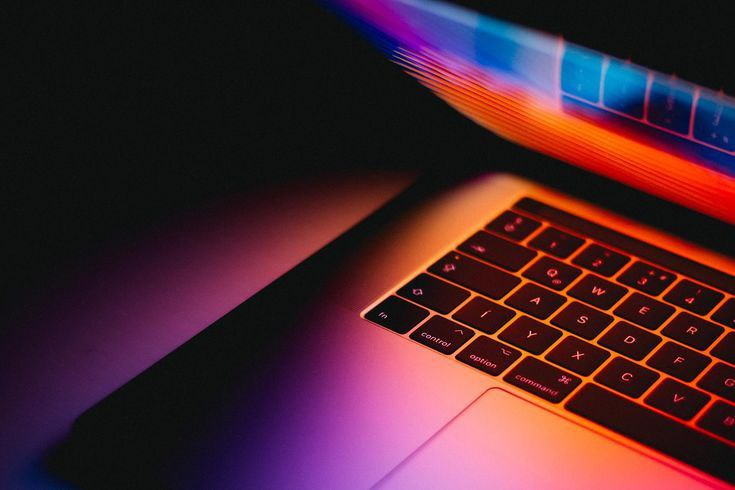

####This project aims to analyze various features of laptops to understand their impact on price. The dataset includes the following attributes:

**Unnamed: 0**: A unique identifier for each laptop entry

**Company**: The manufacturer of the laptop, such as Dell, HP, Lenovo, and Apple

**TypeName**: The type of laptop, e.g., Ultrabook, Gaming, Notebook.

**Inches**: The screen size of the laptop in inches, influencing portability and user experience.

**ScreenResolution**: The display resolution, affecting the clarity and quality of the screen.

**Cpu**: Details of the processor, determining the laptop's performance capabilities.

**Ram**: The amount of Random Access Memory, crucial for multitasking and system responsiveness.

**Memory**: Storage capacity and type (HDD or SSD), impacting data storage and retrieval speeds.

**Gpu**: The graphics processing unit, important for graphics-intensive tasks.

**OpSys**: The operating system, influencing user experience and software compatibility.

**Weight**: The weight of the laptop, affecting its portability.

**Price**: The cost of the laptop, reflecting its overall value and features.


By analyzing these features, we aim to provide insights into how different specifications affect laptop pricing and performance, helping consumers make informed purchasing decisions.

###### **Importing essential libraries for data manipulation, visualization, and machine learning**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import  r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib


######**Reading the laptop dataset from a CSV file into a pandas DataFrame**


In [ ]:
laptop_data=pd.read_csv('/content/laptop_data.csv')
laptop_data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
laptop_data.shape

(1303, 12)

To find the datatypes of features

In [ ]:
laptop_data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

######**Finding missing values**

In [ ]:
laptop_data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

######**Dropping unnecessary columns**

In [ ]:
laptop_data.drop(['Unnamed: 0'],axis=1,inplace=True)

####**Converting data types in the dataset**
1.   ###### Removing 'GB' from the 'Ram' column and converting it to an integer type

2.   ##### Removing 'kg' from the 'Weight' column and converting it to a float type

In [ ]:

laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype(int)
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '').astype(float)




####**VISUALIZATION**

#### **Bargraph** -  Average price of laptop for each company

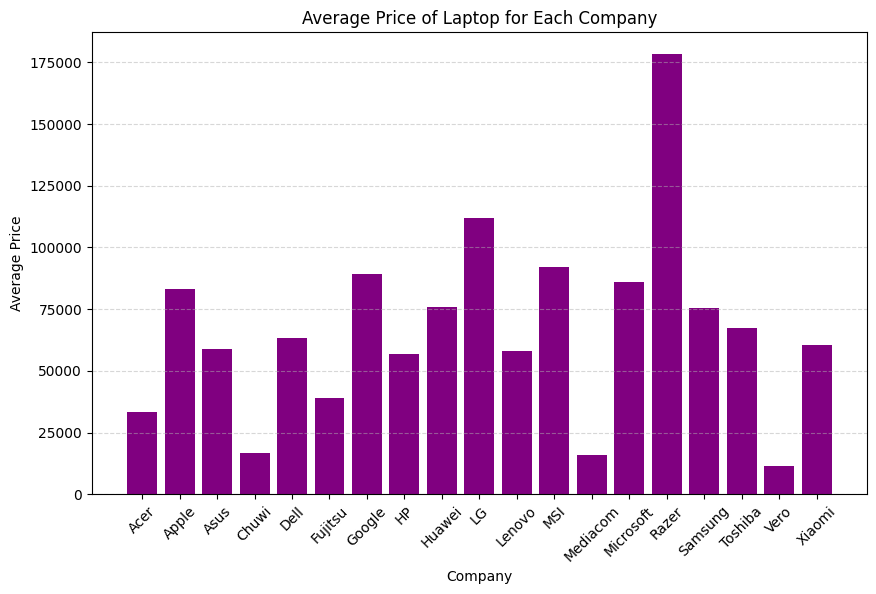

In [ ]:

Average_prices = laptop_data.groupby('Company')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
x = Average_prices['Company']
y = Average_prices['Price']
plt.bar(x,y,color='PURPLE')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Price of Laptop for Each Company')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


######Inference: Company Razer is most expensive among laptops

####**Lineplot** -  Average price for each Laptop Type

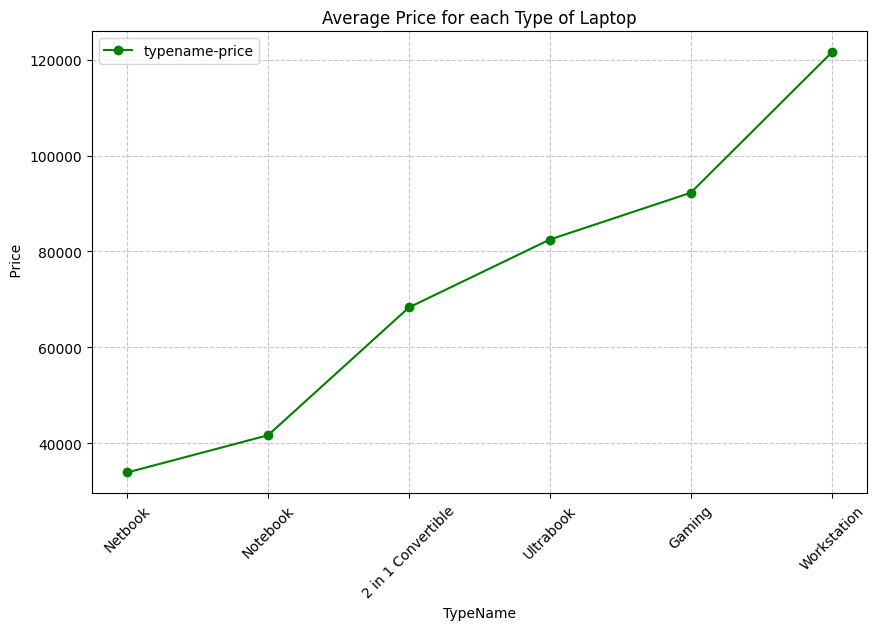

In [ ]:

typename_prices = laptop_data.groupby('TypeName')['Price'].mean().reset_index()
typename_prices = typename_prices.sort_values(by='Price')
plt.figure(figsize=(10, 6))
plt.plot(typename_prices['TypeName'], typename_prices['Price'], marker='o', linestyle='-', color='g', label='typename-price')
plt.xlabel('TypeName')
plt.ylabel(' Price')
plt.title('Average Price for each Type of Laptop')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


######Inference: Workstation type laptop is found costly

####**Pie graph**  - Top 5 Distribution of Operating Systems

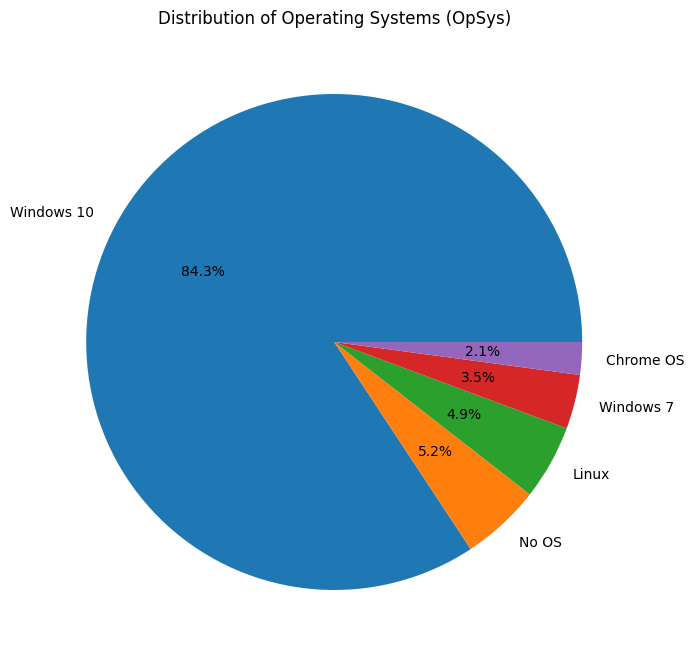

In [ ]:

opsys_counts = laptop_data['OpSys'].value_counts().head(5)
plt.figure(figsize=(8, 12))
plt.pie(opsys_counts, labels=opsys_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Operating Systems (OpSys)')
plt.show()


###### Inference: Windows 10 is mostly found Operating system

#####Plotting number of type of laptops for each company

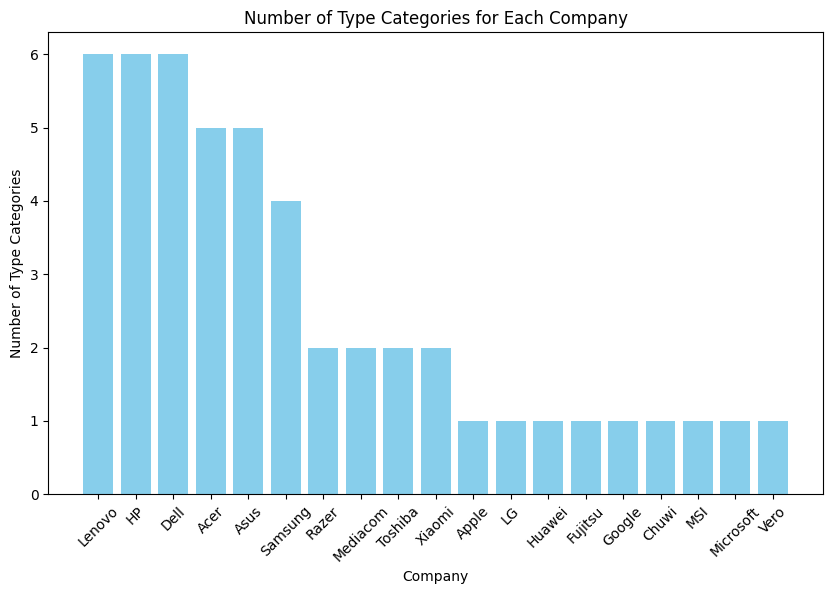

In [ ]:


type_counts = laptop_data.groupby('Company')['TypeName'].nunique().reset_index()
plt.figure(figsize=(10, 6))
type_counts = type_counts.sort_values(by='TypeName', ascending=False)
plt.bar(type_counts['Company'], type_counts['TypeName'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Type Categories')
plt.title('Number of Type Categories for Each Company')
plt.xticks(rotation=45)
plt.show()


######Inference: Lenovo,Dell and HP have highest(6) type of Categories in laptop

####**Regression plot** -  Scatter Plot with Trend Line

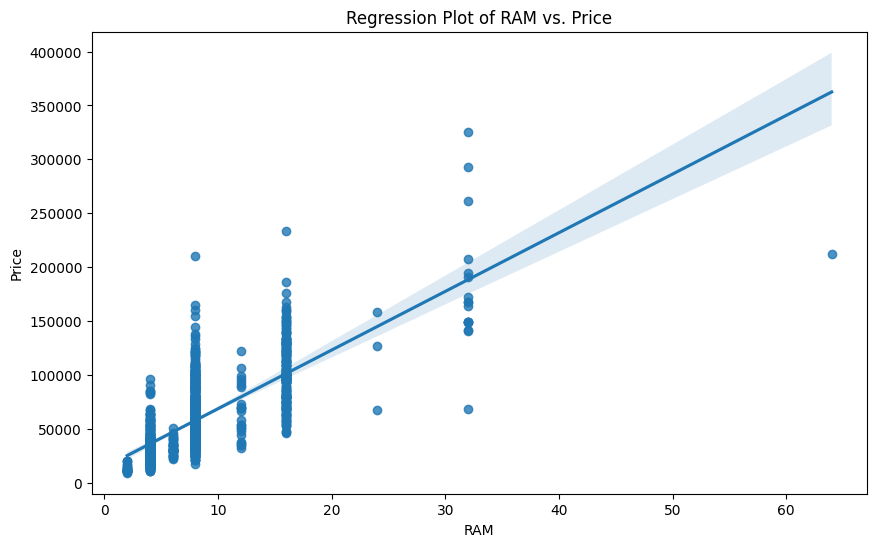

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Ram', y='Price', data=laptop_data)
plt.title('Regression Plot of RAM vs. Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

###### Inference - As RAM increases for laptop Price increases

####**Boxplot** - To find outliers among RAM,Weight,Inches

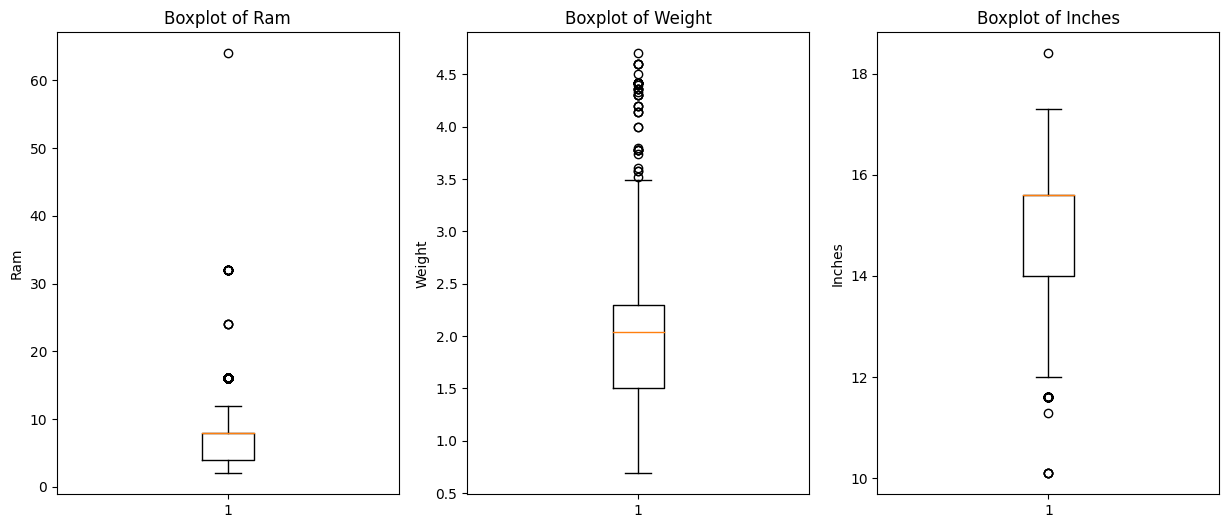

In [ ]:


columns_to_plot = ['Ram', 'Weight', 'Inches']
num_columns = len(columns_to_plot)
plt.figure(figsize=(15, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, num_columns, i)
    plt.boxplot(laptop_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.show()



# Feature engineering
Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning.

1. Creating Pixel per inches(ppi) utilizing screen resolution
2. Extracting CPU Name
3. Extracting Memory into HDD,SDD,Hybrid,Flash storage
4. Extracting GPU Brand :Intel, Nvidia, AMD

In [ ]:
laptop_data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [ ]:
laptop_data['Touchscreen'] = laptop_data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
laptop_data['Ips']=laptop_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


In [ ]:
new = laptop_data['ScreenResolution'].str.split('x',n=1,expand=True)
laptop_data['width'] = new[0]
laptop_data['height'] = new[1]
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,width,height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
laptop_data['width'] = laptop_data['width'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,width,height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
laptop_data['width']=laptop_data['width'].astype('int')
laptop_data['height']=laptop_data['height'].astype('int')
laptop_data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
Ips                   int64
width                 int64
height                int64
dtype: object

In [ ]:
# Pixel per inches(ppi) = (width**2 + height**2)**0.5 /inches

laptop_data['ppi']=(((laptop_data['width']**2) + (laptop_data['height']**2))**0.5/laptop_data['Inches']).astype('float')

In [ ]:
laptop_data.drop(columns=['ScreenResolution','width','height','Inches'],inplace=True)
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
laptop_data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M7-6Y75 1.2GHz      1
Intel Core i5 7200U 2.50GHz      1
Intel Core i5 7200U 2.70GHz      1
Intel Core i5 7200U 2.7GHz       1
Intel Core i7 2.7GHz             1
Name: count, Length: 118, dtype: int64

In [ ]:
laptop_data['CPU name'] =laptop_data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
laptop_data['Processor Category'] = laptop_data['CPU name'].apply(lambda text: text if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3'] else 'Other Intel Processor' if text.startswith('Intel') else 'AMD Processor')
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU name,Processor Category
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [ ]:
laptop_data.drop(columns=['Cpu','CPU name'],inplace=True)
laptop_data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor Category
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
laptop_data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [ ]:
import re


# Define regex patterns for storage types
patterns = {
    'HDD': r'(\d+(?:\.\d+)?TB|\d+GB) HDD',
    'SSD': r'(\d+(?:\.\d+)?TB|\d+GB) SSD',
    'Hybrid': r'(\d+(?:\.\d+)?TB|\d+GB) Hybrid',
    'Flash_Storage': r'(\d+(?:\.\d+)?TB|\d+GB) Flash Storage'
}

# Function to extract storage values
def extract_storage(text, pattern):
    matches = re.findall(pattern, text)
    return sum([convert_to_gb(match) for match in matches])

# Helper function to convert storage size to GB
def convert_to_gb(size):
    if 'TB' in size:
        return float(size.replace('TB', '')) * 1024
    return float(size.replace('GB', ''))

# Initialize columns in the DataFrame
laptop_data['HDD'] = laptop_data['Memory'].apply(lambda x: extract_storage(x, patterns['HDD']))
laptop_data['SSD'] = laptop_data['Memory'].apply(lambda x: extract_storage(x, patterns['SSD']))
laptop_data['Hybrid'] = laptop_data['Memory'].apply(lambda x: extract_storage(x, patterns['Hybrid']))
laptop_data['Flash_Storage'] = laptop_data['Memory'].apply(lambda x: extract_storage(x, patterns['Flash_Storage']))

laptop_data.drop(columns=['Memory'],inplace=True)

# Display the updated DataFrame
laptop_data


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor Category,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0.0,128.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0.0,512.0,0.0,0.0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0.0,0.0,0.0,64.0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1024.0,0.0,0.0,0.0


In [ ]:
laptop_data.dtypes

Company                object
TypeName               object
Ram                     int64
Gpu                    object
OpSys                  object
Weight                float64
Price                 float64
Touchscreen             int64
Ips                     int64
ppi                   float64
Processor Category     object
HDD                   float64
SSD                   float64
Hybrid                float64
Flash_Storage         float64
dtype: object

In [ ]:
laptop_data['Gpu'].value_counts()


Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R7 Graphics       1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
laptop_data['Gpu brand'] = laptop_data['Gpu'].apply(lambda x:x.split()[0])
laptop_data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [ ]:
laptop_data=laptop_data[laptop_data['Gpu brand']!='ARM']
laptop_data.drop(columns=['Gpu'],inplace=True)
laptop_data.head()

<ipython-input-131-e75d702d361d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data.drop(columns=['Gpu'],inplace=True)


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Processor Category,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0,Intel


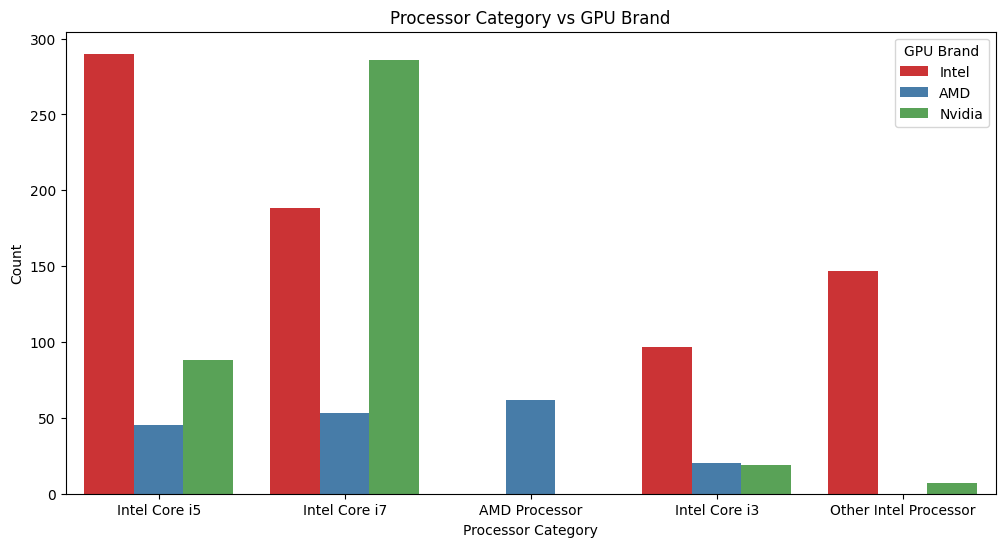

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=laptop_data, x='Processor Category', hue='Gpu brand', palette='Set1')
plt.title('Processor Category vs GPU Brand')
plt.xlabel('Processor Category')
plt.ylabel('Count')
plt.legend(title='GPU Brand')
plt.show()

##Encoding - Using Get dummies
Encoding is done to convert categorical data into numerical format that can be effectively used by machine learning algorithms.








In [ ]:
laptop_data1=pd.get_dummies(laptop_data[['Company',	'TypeName','OpSys','Processor Category','Gpu brand']],drop_first=True).astype('int')
laptop_data1.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Processor Category_Intel Core i3,Processor Category_Intel Core i5,Processor Category_Intel Core i7,Processor Category_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
laptop_data2=pd.concat([laptop_data,laptop_data1],axis=1)
laptop_data2.drop(['Company',	'TypeName','OpSys','Processor Category','Gpu brand'],axis=1,inplace=True)

In [ ]:
laptop_data2

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Processor Category_Intel Core i3,Processor Category_Intel Core i5,Processor Category_Intel Core i7,Processor Category_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983005,0.0,128.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0.0,0.0,0.0,128.0,...,0,0,0,1,0,1,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,0.0,256.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0.0,512.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
4,8,1.37,96095.8080,0,1,226.983005,0.0,256.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0.0,128.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1299,16,1.30,79866.7200,1,1,276.053530,0.0,512.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1300,2,1.50,12201.1200,0,0,111.935204,0.0,0.0,0.0,64.0,...,1,0,0,0,0,0,0,1,1,0
1301,6,2.19,40705.9200,0,0,100.454670,1024.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0


Correlation with target

In [ ]:
correlations=laptop_data2.corr()['Price']
correlations

Ram                                         0.742905
Weight                                      0.209867
Price                                       1.000000
Touchscreen                                 0.192917
Ips                                         0.253320
ppi                                         0.475368
HDD                                        -0.095304
SSD                                         0.670543
Hybrid                                      0.007963
Flash_Storage                              -0.040067
Company_Apple                               0.080636
Company_Asus                               -0.010568
Company_Chuwi                              -0.055680
Company_Dell                                0.048245
Company_Fujitsu                            -0.027164
Company_Google                              0.038068
Company_HP                                 -0.041566
Company_Huawei                              0.016834
Company_LG                                  0.

Removing less correlated columns

In [ ]:
threshold=0.1
selected_columns = correlations[abs(correlations) >= threshold].index.tolist()
laptop_data = laptop_data2[selected_columns]
laptop_data



,Ram,Weight,Price,Touchscreen,Ips,ppi,SSD,Company_MSI,Company_Razer,TypeName_Gaming,...,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,Processor Category_Intel Core i3,Processor Category_Intel Core i5,Processor Category_Intel Core i7,Processor Category_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983005,128.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,256.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,512.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8,1.37,96095.8080,0,1,226.983005,256.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,128.0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1299,16,1.30,79866.7200,1,1,276.053530,512.0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1300,2,1.50,12201.1200,0,0,111.935204,0.0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1301,6,2.19,40705.9200,0,0,100.454670,0.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


###Model Initilization using Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

feature=laptop_data.drop(columns=['Price'])
target=laptop_data['Price']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

models = [
    ("Linear Regression", Pipeline([
        ("regressor", LinearRegression())
    ])),
    ("Decision Tree", Pipeline([
        ("regressor", DecisionTreeRegressor())
    ])),
    ("Gradient Boosting", Pipeline([
        ("regressor", GradientBoostingRegressor())
    ])),
    ("Random Forest", Pipeline([
        ("regressor", RandomForestRegressor())
    ]))
]

model_names = []
r2_scores = []


for name, model in models:
    # Fit the model
    model.fit(feature_train, target_train)

    # Predict on the test set
    target_prediction = model.predict(feature_test)

    # Calculate evaluation metrics
    r2 = r2_score(target_test, target_prediction)

    # Store the results
    model_names.append(name)
    r2_scores.append(r2)


    # Print the results
    print(f"{name}, R-squared: {r2:.4f}")
    print(' ')


Linear Regression, R-squared: 0.7272
 
Decision Tree, R-squared: 0.7425
 
Gradient Boosting, R-squared: 0.7909
 
Random Forest, R-squared: 0.8128
 


###Comparing performance of various Models

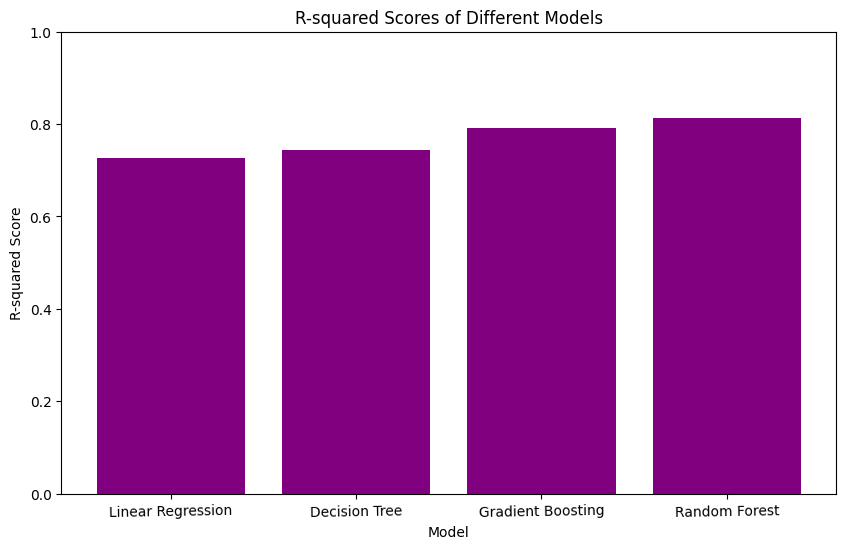

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='purple')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=1)
plt.show()

##### Inference: Random Forest have highest evaluation score - 0.8123

##Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters that govern the training of a machine learning model to improve its performance.

Hyperparameter tuning is performed on the Random Forest Regressor to find the best score.




In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'bootstrap':[True,False],
    'random_state':[0, 1, 42]}

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Set up the grid search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(feature_train, target_train)

# Output the best parameters
print("Best parameters found: ", grid_search_rf.best_params_)



Best parameters found:  {'bootstrap': True, 'n_estimators': 100, 'random_state': 42}


In [ ]:
model= RandomForestRegressor(n_estimators=100, random_state=42,bootstrap=True)

# Fit the model on the training data
model.fit(feature_train, target_train)

# Predict the target values for the test data
target_pred_rf = model.predict(feature_test)

# Calculate the R-squared score for the predictions
r2_score_rf = r2_score(target_test, target_pred_rf)

r2_score_rf

0.816082825843178

Joblib is used to efficiently save and load machine learning models and large datasets.

In [ ]:
joblib.dump(model,'laptop price prediction')

['laptop price prediction']